In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()
tf.set_random_seed(777)
print(tf.__version__)


1.13.1


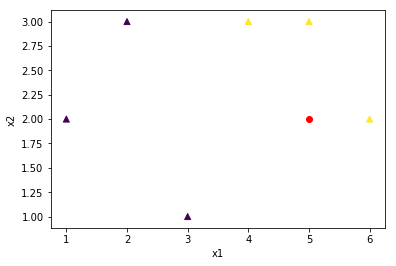

In [0]:
# x_data(2차원 배열)을 2차원 공간에 표현해서 x1,x2를 기준으로 y_data 0과 1로 구분하는 예제
# Logistic Classification을 통해 보라색과 노란색 y_data(Label)을 구분해보자
# Test 데이터는 붉은색의 위치와 같이 추론시 1의 값을 갖게 된다. 
x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]

y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5., 2.]]
y_test = [[1.]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0]%3) for y in y_train]
plt.scatter(x1,x2, c=colors, marker='^')
plt.scatter(x_test[0][0], x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [0]:
# 위의 data를 기준으로 가설의 검증을 통해 Logistic Classification 모델을 만들어보자
# Tensorflow data API를 통해 학습시킬 값들을 담는다(Batch Size는 한번에 학습시킬 Size)
# features, labels는 실제 학습에 쓰일 Data(연산을 위해 Type을 맞춰준다)
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

# 위 Data를 기준으로 가설의 검증을 통해 Logistic Classification 모델을 만들어보자
# W와 b는 학습을 통해 생성되는 모델에 쓰이는 Weight와 Bias (초기값은 0이나 Random값으로 한다)
W = tf.Variable(tf.zeros([2, 1]), name='weight')
b = tf.Variable(tf.zeros([1], name='bias'))

# Sigmoid를 가설로 선언해보자.(tf.sigmoid(tf.matmul(X, W)+b)와 같다)
def logistic_regression(features):
  hypothesis = tf.div(1., 1. + tf.exp(tf.matmul(features, W)+b))#sigmoid = 1/1+exp(-x)
  return hypothesis

# 가설을 검증할 Cost 함수를 정의함
def loss_fn(hypothesis, features, labels):
  cost = -tf.reduce_mean(labels * tf.log(logistic_regression(features)) + (1-labels)*tf.log(1-hypothesis))
  return cost

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# 추론한 값은 0.5를 기준(Sigmoid 그래프 참조)로 0과 1의 값을 리턴함
# Sigmoid 함수를 통해 예측값이 0.5보다 크면 1을 반환하고 0.5보다 작으면 0으로 반환함
# 가설을 통해 실제 값과 비교한 정확도를 측정함
def accuracy_fn(hypothesis, labels):
  predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
  return accuracy

# GradientTape를 통해 경사값을 계산함
def grad(hypothesis, features, labels):
  with tf.GradientTape() as tape:
    loss_value = loss_fn(logistic_regression(features), features, labels)
  return tape.gradient(loss_value, [W, b])

# 학습을 실행함
# 위의 Data를 Cost함수를 통해 학습을 시킨 후 모델을 생성함
# 새로운 Data를 통한 수행[5,2]의 Data로 테스트 수행(그래프 상에서 1이 나와야 정상)
EPOCHS = 1001

for step in range(EPOCHS):
  for features, labels in tfe.Iterator(dataset):
    grads = grad(logistic_regression(features), features, labels)
    optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
    if step % 100 == 0:
      print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features), features, labels)))
      test_acc = accuracy_fn(logistic_regression(x_test), y_test)
      print("Testset Accuracy: {:.4f}".format(test_acc))
    

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Iter: 0, Loss: 0.6874
Testset Accuracy: 1.0000
Iter: 100, Loss: 0.5776
Testset Accuracy: 1.0000
Iter: 200, Loss: 0.5349
Testset Accuracy: 1.0000
Iter: 300, Loss: 0.5054
Testset Accuracy: 1.0000
Iter: 400, Loss: 0.4838
Testset Accuracy: 1.0000
Iter: 500, Loss: 0.4671
Testset Accuracy: 1.0000
Iter: 600, Loss: 0.4535
Testset Accuracy: 1.0000
Iter: 700, Loss: 0.4420
Testset Accuracy: 1.0000
Iter: 800, Loss: 0.4319
Testset Accuracy: 1.0000
Iter: 900, Loss: 0.4228
Testset Accuracy: 1.0000
Iter: 1000, Loss: 0.4144
Testset Accuracy: 1.0000
